In [2]:
import pandas as pd
import numpy as np

import konlpy
from gensim.models import Word2Vec 

In [4]:
#파일 불러오기
origin = pd.read_csv("../../letter_korean_corpus.csv")
poem = origin

poem_idf_ranking = pd.read_csv("TF-IDF/letter_tf_idf_ranking.csv")
poem_LDA_ranking = pd.read_csv("LDA/letter_LDA_ranking_more_50P.csv")

In [25]:
#모델 불러오기
letter_word2vec = Word2Vec.load('word2vec/letter_labeling_word2vec')

# 레이블링 테이블 생성

### 레이블링 전

In [5]:
poem_before_labeling = poem_idf_ranking

In [12]:
poem_before_labeling[['LDA_1st', 'LDA_2nd', 'LDA_3rd']] = poem_LDA_ranking[['0', '1', '2']]

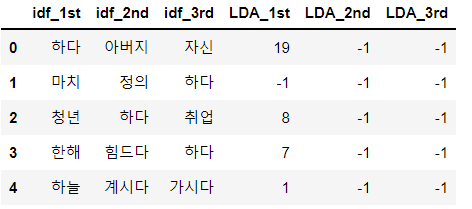

### 레이블링 후

In [14]:
poem_after_labeling = pd.DataFrame(index = range(len(poem_before_labeling)), columns=['사랑', '자연', '절망', '죽음', '행복', '슬픔', '좋다', '우정', '가족', '밤', '동물', '계절', '일생', '기억', '신체', '물건', '색깔', '동네', '조용하다', '음식', '날씨', '차분해지다', '사색', '여행', '동화', '감성'])
poem_after_labeling = poem_after_labeling.fillna(0)

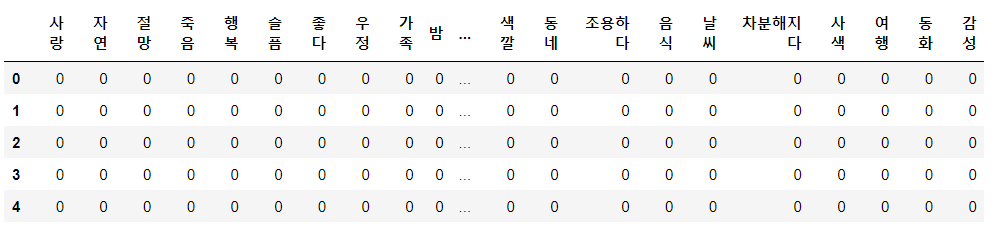

# 레이블링 함수

### LDA

In [ ]:
"""
    엑셀 파일에서 수기로 입력한 토픽의 제목을 딕셔너리로 입력하는 알고리즘,
    직접 입력해야함
    한번만 입력하면 되기 때문에 실수로 또 실행하지 않도록 주석처리 해놓음
"""

In [31]:
# #LDA 토픽 매칭 작성

# not_index_list = [num for num in (12, 13, 14, 16, 21, 22, 24, 25)]
# index_list = list(range(26))

# for i in not_index_list:
#     index_list.remove(i)

# LDA_dict = {}
# for key in index_list:
#     input_word = input(str(key))

#     word_list = []
#     for word in (input_word.split(',')):
#         word_list.append(word)

#     LDA_dict[key] = word_list

In [32]:
LDA_dict

{0: ['일생'],
 1: ['슬픔'],
 2: ['우정', '기억'],
 3: ['가족'],
 4: ['사랑', '슬픔'],
 5: ['사색'],
 6: ['차분해지다'],
 7: ['기억'],
 8: ['절망'],
 9: ['일생'],
 10: ['음식'],
 11: ['죽음'],
 15: ['우정'],
 17: ['조용하다'],
 18: ['사색'],
 19: ['색깔'],
 20: ['자연'],
 23: ['가족', '사랑']}

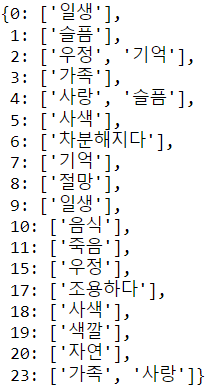

### TF-IDF

In [18]:
def change_word(vec_word):
    """
        word2vec모델로 키워드를 매칭할 때 매칭 단어와 실제 클래스가 달라서 매칭단어를 클래스로 변환하는 함수
        change_word함수가 필요한 이유는 '꽃'을 매칭 단어로 '자연'을 사용할 때 보다 '풀'을 사용할 때
        더 높은 확률로 비슷하다고 인식하기 때문
    """
    if vec_word == '풀':
        vec_word = '자연'
    elif  vec_word == '잊다':
        vec_word = '죽음'
    elif  vec_word == '도망':
        vec_word = '슬픔'
    elif  vec_word == '아버지':
        vec_word = '가족'
    elif  vec_word == '새벽':
        vec_word = '밤'
    elif  vec_word == '송아지':
        vec_word = '동물'
    elif  vec_word == '머리':
        vec_word = '신체'
    elif  vec_word == '바퀴':
        vec_word = '물건'
    elif  vec_word == '붉다':
        vec_word = '색깔'
    elif  vec_word == '시골':
        vec_word = '동네'
    elif  vec_word == '보리밥':
        vec_word = '음식'
    elif  vec_word == '비':
        vec_word = '날씨'
    elif  vec_word == '음미':
        vec_word = '사색'
    elif  vec_word == '별빛':
        vec_word = '동화'
    elif  vec_word == '구름':
        vec_word = '감성'
    
    return vec_word

        
def check_idf(word):
    """
        tf-idf를 적용한, 편지에서 가장 많이 나온 단어를 word2vec으로 키워드 매칭하고
        가장 유사한 키워드를 반환하는 함수
    """
    
    search_list = []
    for vec_word in ['사랑', '풀', '절망', '잊다', '행복', '도망', '좋다', '우정', '아버지', '새벽', '송아지', '계절', '일생', '기억', '머리', '바퀴', '붉다', '시골', '조용하다', '보리밥', '비', '차분해지다', '음미', '여행', '별빛', '구름']:
        score = letter_word2vec.wv.similarity(vec_word, word)
        search_list.append((change_word(vec_word), score))
    
    first = sorted(search_list, key = lambda x: (x[1]), reverse=True)[1][0]
    
    return first

### 숫자 레이블링

In [19]:
from tqdm import trange, notebook # show progress-bar

# 인덱스 하나씩 확인, 즉 하나의 row씩 확인
for index in notebook.tqdm(range(len(poem_before_labeling))):
    # 하나의 컬럼씩 확인
    for i, col in enumerate(poem_before_labeling.columns):
        #컬럼이 idf_1st일때
        if col == 'idf_1st':
            # idf_1st의 값을 가져와서
            word = poem_before_labeling.iloc[index][col]
            # word2vec매칭 함수를 적용하고, poem_after_labeling의 해당하는 컬럼에 1저장
            poem_after_labeling.loc[index, check_idf(word)] = 1
        elif col == 'idf_2nd':
            word = poem_before_labeling.iloc[index][col]
            poem_after_labeling.loc[index, check_idf(word)] = 1
        elif col == 'idf_3rd':
            word = poem_before_labeling.iloc[index][col]
            poem_after_labeling.loc[index, check_idf(word)] = 1
        #컬럼이 LDA_1st일때
        elif col == 'LDA_1st':
            # LDA_1st의 값을 가져와서
            topics = poem_before_labeling.iloc[index][col]
            # 토픽의 값이 -1이 아니면,
            if topics != -1:
                #토픽의 값을 가져와서 poem_after_labeling의 해당하는 컬럼에 1저장
                #for문을 사용한 이유는 ['우정', '기억'] 등 클래스가 두개씩 매칭된 토픽도 있기 때문
                for topic in LDA_dict[topics]:
                    poem_after_labeling.loc[index, topic] = 1
        elif col == 'LDA_2nd':
            topics = poem_before_labeling.iloc[index][col]
            if topics != -1:
                for topic in LDA_dict[topics]:
                    poem_after_labeling.loc[index, topic] = 1
        elif col == 'LDA_3rd':
            topics = poem_before_labeling.iloc[index][col]
            if topics != -1:
                for topic in LDA_dict[topics]:
                    poem_after_labeling.loc[index, topic] = 1

NameError: name 'letter_word2vec' is not defined

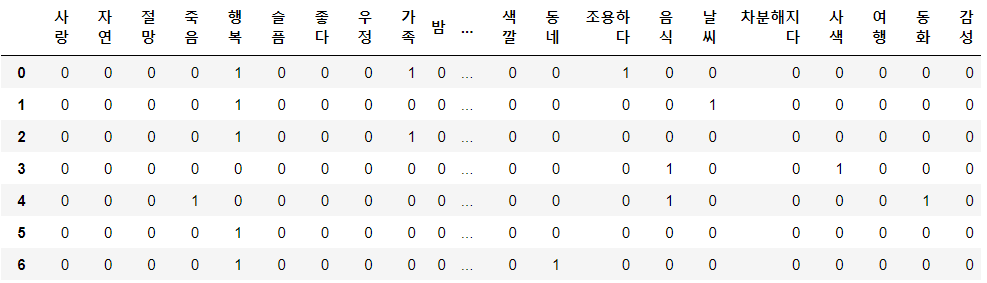

## 수기 레이블 검수용 CSV파일 내보내기
사람이 읽으면서 검수하기 편하게 0,1을 단어로 바꿔주는 작업

In [91]:
col_size = 5

poem_after_labeling_string = pd.DataFrame()

In [98]:
from tqdm import trange, notebook # show progress-bar

max_col = 0
for index in notebook.tqdm(range(len(poem_before_labeling))):
    word_list_str = []
    for i, col in enumerate(poem_before_labeling.columns):
        if col == 'idf_1st':
            word = poem_before_labeling.iloc[index][col]
            word_list_str.append(check_idf(word))
        elif col == 'idf_2nd':
            word = poem_before_labeling.iloc[index][col]
            word_list_str.append(check_idf(word))
        elif col == 'idf_3rd':
            word = poem_before_labeling.iloc[index][col]
            word_list_str.append(check_idf(word))
        elif col == 'LDA_1st':
            topics = poem_before_labeling.iloc[index][col]
            if topics != -1:
                for topic in LDA_dict[topics]:
                    word_list_str.append(topic)
        elif col == 'LDA_2nd':
            topics = poem_before_labeling.iloc[index][col]
            if topics != -1:
                for topic in LDA_dict[topics]:
                    word_list_str.append(topic)
        elif col == 'LDA_3rd':
            topics = poem_before_labeling.iloc[index][col]
            if topics != -1:
                for topic in LDA_dict[topics]:
                    word_list_str.append(topic)
    
    # 컬럼의 개수가 다르면 데이터 프래임을 만들어줄 수 없기 때문에 0으로 채워줌
    for i in range(col_size):
        if len(word_list_str) < col_size:
            word_list_str.append(0)
    
    poem_after_labeling_string.loc[index] = word_list_str

['신체', '행복', '조용하다', '가족', 0]



ValueError: Length of values does not match length of index

In [101]:
poem_after_labeling_string['contents'] = origin['contents']

In [103]:
poem_after_labeling_string = poem_after_labeling_string[['contents', 0,1,2,3,4]]

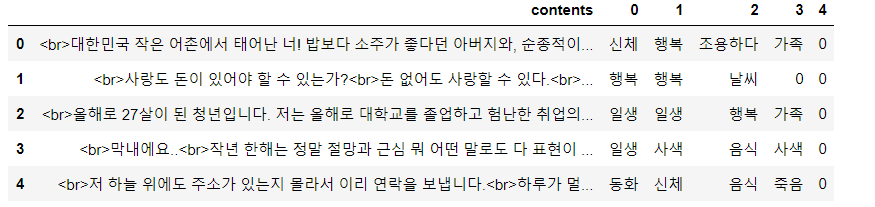

In [105]:
poem_after_labeling_string.to_csv("./수기작성.csv", index=False)

# 수기 수정 데이터 적용
수기로 검수한 파일을 다시 0,1 학습 데이터로 변환하는 코드

In [129]:
excel_data = pd.read_excel("letter_data_multi_train.xlsx")
excel_data.to_csv("letter_data_multi_train.csv", index=False)

In [130]:
letter_data = pd.read_csv("letter_data_multi_train.csv")

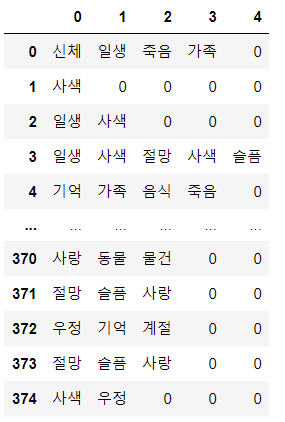

In [ ]:
letter_after_labeling = pd.DataFrame(index = range(len(poem_before_labeling)), columns=['사랑', '자연', '절망', '죽음', '행복', '슬픔', '좋다', '우정', '가족', '밤', '동물', '계절', '일생', '기억', '신체', '물건', '색깔', '동네', '조용하다', '음식', '날씨', '차분해지다', '사색', '여행', '동화', '감성'])
letter_after_labeling = letter_after_labeling.fillna(0)

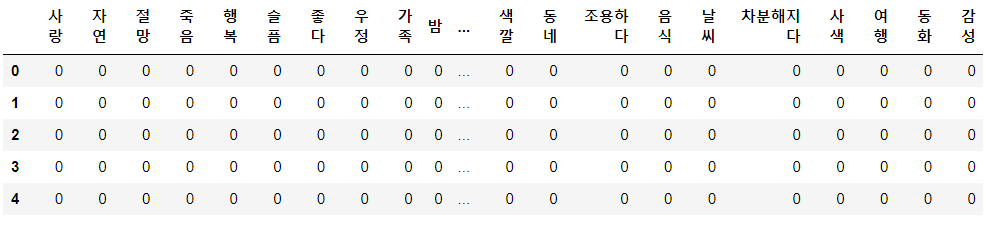

In [133]:
for index in range(len(letter_data)):
    classes = letter_data.loc[index].values.tolist()
    for cla in classes:
        if cla != '0':
            letter_after_labeling.loc[index, cla] = 1

In [135]:
letter_after_labeling['contents'] = origin['contents']
letter_after_labeling = letter_after_labeling[['contents', '사랑', '자연', '절망', '죽음', '행복', '슬픔', '좋다', '우정', '가족', '밤', '동물', '계절', '일생', '기억', '신체', '물건', '색깔', '동네', '조용하다', '음식', '날씨', '차분해지다', '사색', '여행', '동화', '감성']]

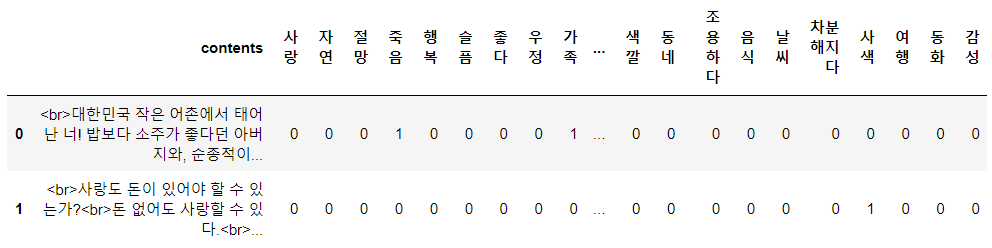

In [146]:
letter_after_labeling.to_csv("letter_train_data.csv", index=False)